In [83]:
import os.path
import glob
import matplotlib.pyplot as plt
import numpy as np

import iris
import iris.coords as coords
from iris import coord_systems
import iris.plot as iplt
import iris.quickplot as qplt
from iris.analysis import cartography
from iris.experimental.raster import export_geotiff

In [97]:
PATH = '/home/jack/data/cmsaf/hourly'
netcdf_filenames = glob.glob(os.path.join(PATH, '*.nc'))
netcdf_filenames.sort()
netcdf_filenames

['/home/jack/data/cmsaf/hourly/DNIdm201201010000002UD1000101UD.nc',
 '/home/jack/data/cmsaf/hourly/DNIdm201201020000002UD1000101UD.nc',
 '/home/jack/data/cmsaf/hourly/DNIdm201201030000002UD1000101UD.nc',
 '/home/jack/data/cmsaf/hourly/DNIdm201201040000002UD1000101UD.nc',
 '/home/jack/data/cmsaf/hourly/DNIdm201201050000002UD1000101UD.nc',
 '/home/jack/data/cmsaf/hourly/DNIdm201201060000002UD1000101UD.nc',
 '/home/jack/data/cmsaf/hourly/DNIdm201201070000002UD1000101UD.nc',
 '/home/jack/data/cmsaf/hourly/DNIdm201201080000002UD1000101UD.nc',
 '/home/jack/data/cmsaf/hourly/DNIdm201201090000002UD1000101UD.nc',
 '/home/jack/data/cmsaf/hourly/DNIdm201201100000002UD1000101UD.nc',
 '/home/jack/data/cmsaf/hourly/DNIdm201201110000002UD1000101UD.nc',
 '/home/jack/data/cmsaf/hourly/DNIdm201201120000002UD1000101UD.nc',
 '/home/jack/data/cmsaf/hourly/DNIdm201201130000002UD1000101UD.nc',
 '/home/jack/data/cmsaf/hourly/DNIdm201201140000002UD1000101UD.nc',
 '/home/jack/data/cmsaf/hourly/DNIdm201201150000

In [91]:
def load_irradiance(netcdf_filename):
    _, irradiance = iris.load_raw(filename)
    irradiance = irradiance[0]  # get rid of time dimension
    return irradiance


# BOUNDING_BOX
NORTH = 59
SOUTH = 48
EAST = 2
WEST = -10


def subset_to_uk(cube):
    constraint = iris.Constraint(
        coord_values={
            'latitude': lambda cell: SOUTH < cell < NORTH,
            'longitude': lambda cell: WEST < cell < EAST
        })
    return cube.extract(constraint)


def guess_bounds(cube):
    for coord in ['latitude', 'longitude']:
        cube.coord(coord).guess_bounds()
    return cube


def interpolate_to_linear_grid(cube):
    sample_points = [
        ('longitude', np.arange(start=WEST, stop=EAST, step=STEP)),
        ('latitude', np.arange(start=SOUTH, stop=NORTH, step=STEP))]

    return cube.interpolate(
        sample_points, 
        scheme=iris.analysis.Linear())


def plot_irradiance(cube, plot_contour=True):
    if plot_contour:
        qplt.contour(cube)
    else:
        qplt.pcolor(cube)
    ax = plt.gca()
    ax.coastlines()
    plt.show()
    return ax

In [99]:
filename

'/home/jack/data/cmsaf/hourly/DNIdm201201260000002UD1000101UD.nc'

In [98]:
_, irradiance = iris.load_raw(filename)
irradiance

<iris 'Cube' of direct normal irradiance / (Watt m-2) (time: 1; latitude: 277; longitude: 325)>

In [92]:
for filename in netcdf_filenames:
    print("Loading", filename)
    irradiance = load_irradiance(filename)
    irradiance = subset_to_uk(irradiance)
    irradiance = interpolate_to_linear_grid(irradiance)
    irradiance = guess_bounds(irradiance)
    geotiff_filename = os.path.splitext(filename)[0] + '.geotiff'
    print("    Saving", geotiff_filename)
    export_geotiff(irradiance, geotiff_filename)

Loading /home/jack/data/cmsaf/hourly/DNIdm201203250000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201203250000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201203090000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201203090000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201210310000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201210310000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201208140000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201208140000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201205310000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201205310000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201208070000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201208070000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201211220000002UD1000101UD.nc
    Saving /home

    Saving /home/jack/data/cmsaf/hourly/DNIdm201203180000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201201300000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201201300000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201205100000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201205100000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201205120000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201205120000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201203240000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201203240000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201202050000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201202050000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201206090000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201206090000002UD1000101UD.geotiff
Loading 

    Saving /home/jack/data/cmsaf/hourly/DNIdm201202240000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201212060000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201212060000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201205160000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201205160000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201206180000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201206180000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201203070000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201203070000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201202200000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201202200000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201210090000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201210090000002UD1000101UD.geotiff
Loading 

    Saving /home/jack/data/cmsaf/hourly/DNIdm201210070000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201205030000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201205030000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201205130000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201205130000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201203110000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201203110000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201205060000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201205060000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201211160000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201211160000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201201060000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201201060000002UD1000101UD.geotiff
Loading 

    Saving /home/jack/data/cmsaf/hourly/DNIdm201210150000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201210050000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201210050000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201207120000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201207120000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201209260000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201209260000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201207150000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201207150000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201212120000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201212120000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201210240000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201210240000002UD1000101UD.geotiff
Loading 

    Saving /home/jack/data/cmsaf/hourly/DNIdm201201090000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201211170000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201211170000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201203300000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201203300000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201202060000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201202060000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201209090000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201209090000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201204140000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201204140000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201205260000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201205260000002UD1000101UD.geotiff
Loading 

    Saving /home/jack/data/cmsaf/hourly/DNIdm201203120000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201202120000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201202120000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201208290000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201208290000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201205270000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201205270000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201211240000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201211240000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201208300000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201208300000002UD1000101UD.geotiff
Loading /home/jack/data/cmsaf/hourly/DNIdm201209050000002UD1000101UD.nc
    Saving /home/jack/data/cmsaf/hourly/DNIdm201209050000002UD1000101UD.geotiff
Loading 

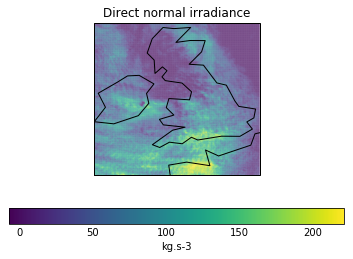

In [94]:
plot_irradiance(irradiance, plot_contour=False)

In [78]:
print(irradiance)

solar surface irradiance / (Watt m-2) (latitude: 220; longitude: 240)
     Dimension coordinates:
          latitude                             x               -
          longitude                            -               x
     Scalar coordinates:
          time: 2013-01-01 00:00:00
     Attributes:
          Conventions: CF-1.6
          DOI: 10.5676/EUM_SAF_CM/SARAH/V001
          institution: EUMETSAT Satellite Application Facility on Climate Monitoring (CM SAF),...
          title: Surface Solar Radiation Data Set (SARAH)
